Rylie Byers 
May 24, 2024 
CS6017

# Homework 1: Python intro and simple statistics

In [162]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm

# Python/Numpy


## Write functions to compute the mean, and standard deviation of a list of data

### Mean:

In [163]:
#function to calculate average 
# average = sum of total elements/ number of elements
def compute_mean(data):
    return sum(data) / len(data)

### Standard Deviation:

In [164]:
#function to calculate standard deviation
# σ= sqrt(∑^Ni=1(xi−μ)^2 /N)
#σ is the standard deviation,
#xi is each individual data point
#μ is the mean of the data points
#N is the total number of data points

def compute_std(data):
    mean = compute_mean(data)
    variance = sum((x - mean) ** 2 for x in data) / len(data)
    return np.sqrt(variance)

## Use scipy.stats.norm to sample from the normal(gaussian) distribution. Compute the mean, and standard deviation of your set of samples using your functions, and with the built in numpy methods. Verify you get the expected results (you know what these values should be if you sample from a normal distribution).

In [165]:
# Generate samples from a normal distribution
sample_size = 1000
mu, sigma = 0, 1 # mean and standard deviation
samples = np.random.normal(mu, sigma, sample_size)

# Compute mean and standard deviation using custom functions
custom_mean = compute_mean(samples)
custom_std = compute_std(samples)

# Compute mean and standard deviation using numpy built-in methods
np_mean = np.mean(samples)
np_std = np.std(samples)

# Verify the results
print("Custom Mean:", custom_mean, "Numpy Mean:", np_mean)
print("Custom Standard Deviation:", custom_std, "Numpy Standard Deviation:", np_std)


Custom Mean: -0.027501591775377192 Numpy Mean: -0.02750159177537718
Custom Standard Deviation: 0.9961910289734436 Numpy Standard Deviation: 0.996191028973444


##  Plot a histogram of your samples

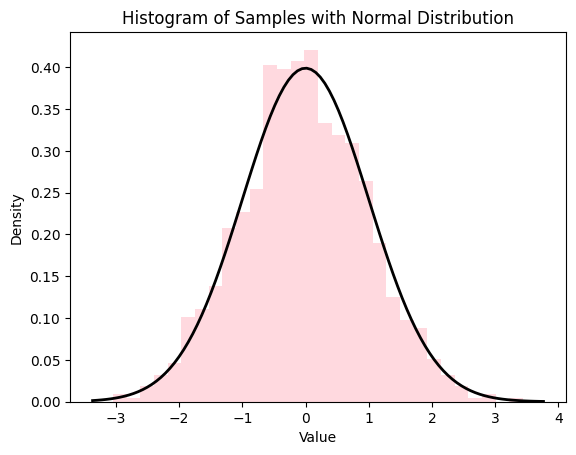

In [166]:
plt.hist(samples, bins=30, density=True, alpha=0.6, color='pink')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2)
plt.title("Histogram of Samples with Normal Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

# Data Exploration/Analyis

Grab a year's worth of hourly SLC PM2.5 data in CSV form from here (at the bottom)

Pick one of the monitoring stations from the dataset and perform your analysis from the readings from that station.

Plot the readings from that station over the course of a year

You'll find that there's so much data that it's a slightly difficult to gain much insignt from this visualization. We want to explore the variation of pollution levels over time, looking at 2 different timescales.





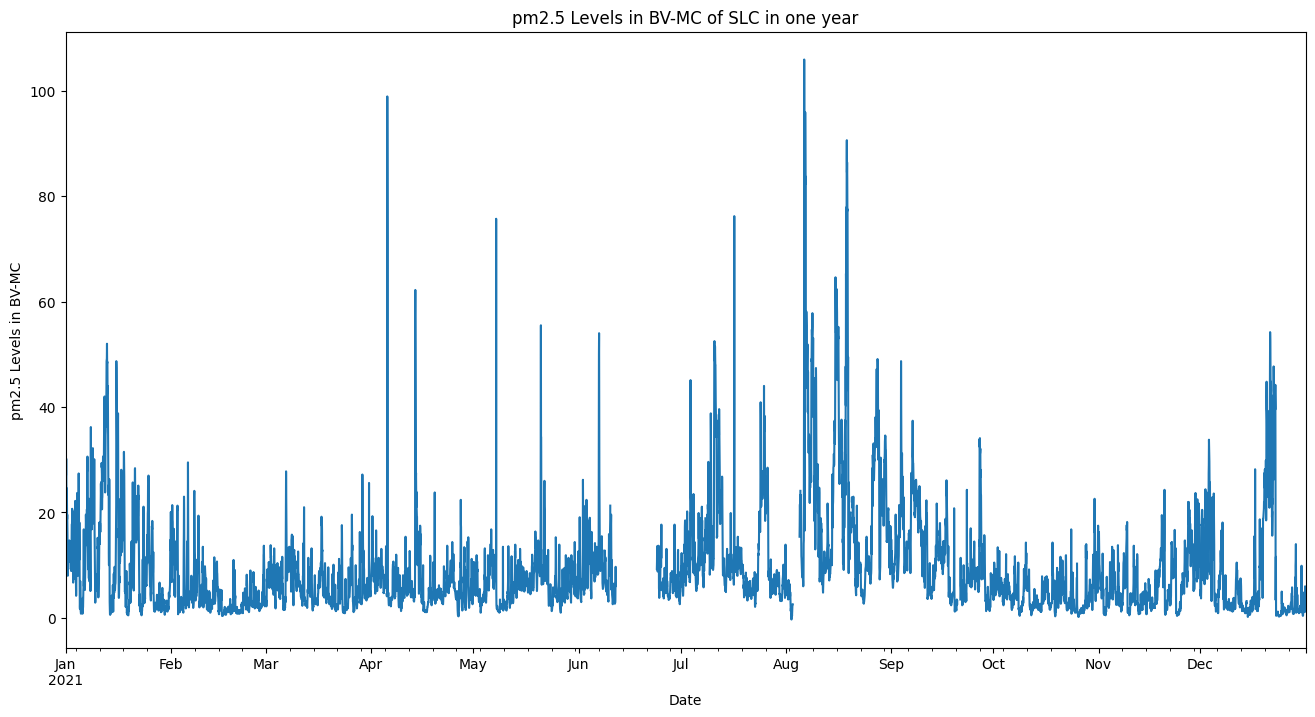

In [167]:

dataFrame = pd.read_csv("2021-PM2.5.csv")
dataFrame = dataFrame[['Date', 'BV-MC']]
dataFrame['Date'] = pd.to_datetime(dataFrame['Date'])
dataFrame.set_index('Date', inplace=True)

plt.figure(figsize=(16, 8))  
dataFrame['BV-MC'].plot()
plt.xlabel('Date')
plt.ylabel('pm2.5 Levels in BV-MC')
plt.title('pm2.5 Levels in BV-MC of SLC in one year')

plt.show()

Plot the mean pm2.5 level for each month using a bar chart. Note any insights you can gain from this visualization.


It looks like august has the highest PM2.5 levels. That might be due to people going on vacations and traveling for/ before going back to school around this time. Also typically July and august are the hottest months in utah, so that probably affects air quality as well. 

October is probably the lowest due to it being cold and people don't really travel during this time. I think the levels starting to increase again in november and december is due to traveling for the holidays. 



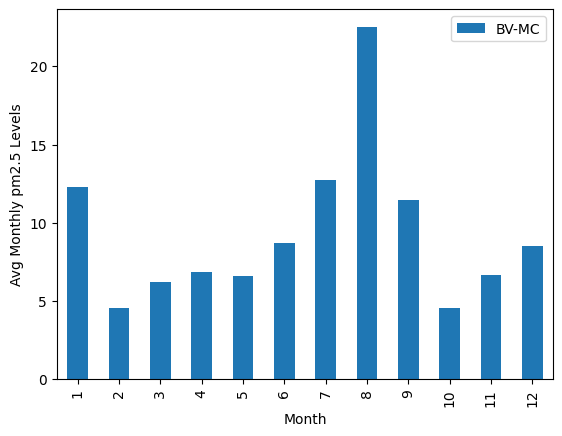

In [168]:

monthAvgs = dataFrame.groupby(dataFrame.index.month).mean()
monthAvgs.plot(kind="bar")
plt.ylabel('Avg Monthly pm2.5 Levels')
plt.xlabel('Month')
plt.show()

Next, group the data by time of day (by hour), and plot the mean pollution level for each hour. What insights can you draw from this view of the data?


The pollution levels start to  pick up around 6 am and continues to increase until 9 am. This is probably due to morning commutes. The pollution levels most likely dip while everyone is in school or at work. I am surprised that in the evening the levels don't increase as much in the morning for the commute back home. 



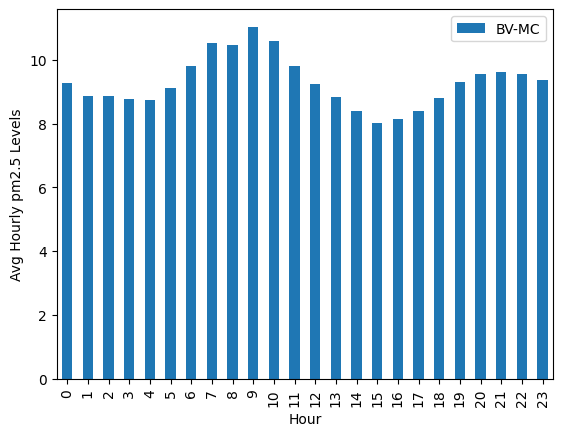

In [169]:

hourAvgs = dataFrame.groupby(dataFrame.index.hour).mean()
hourAvgs.plot(kind="bar")
plt.ylabel('Avg Hourly pm2.5 Levels')
plt.xlabel('Hour')
plt.show()

The mean only gives us a very coarse view of the monthly/hourly data. Use Box and Whisker plots of the monthly and hourly data groupings to provide a more complete view of the data. Does this view provide any additional insights?

For the average monthly one the data is positively skewed with a small variability in it which means the points are close together. There is also one outlier

For the average hourly one the data isn't really skewed, but there is a larger variability. There is also one outlier.

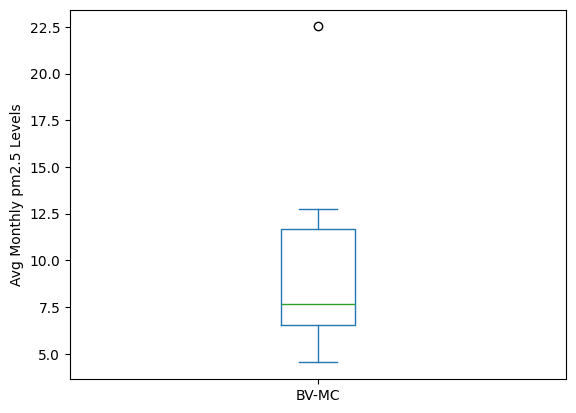

In [170]:
monthAvgs = dataFrame.groupby(dataFrame.index.month).mean()
monthAvgs.plot(kind="box")
plt.xlabel('')
plt.ylabel('Avg Monthly pm2.5 Levels')
plt.show()

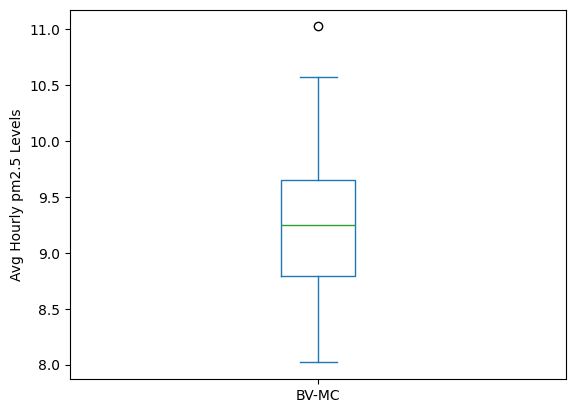

In [171]:
hourAvgs.plot(kind="box")
plt.ylabel('Avg Hourly pm2.5 Levels')
plt.xlabel('')
plt.show()